In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('./data/train_df.csv')
df_test = pd.read_csv('./data/test_df.csv')

In [3]:
print(f'train lenght : {len(df_train)}')
print(f' test lenght : {len(df_test)}')

train lenght : 4277
 test lenght : 2154


In [4]:
print(df_train.info())
print('=============================')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      4277 non-null   int64 
 1   file_name  4277 non-null   object
 2   class      4277 non-null   object
 3   state      4277 non-null   object
 4   label      4277 non-null   object
dtypes: int64(1), object(4)
memory usage: 167.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      2154 non-null   int64 
 1   file_name  2154 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.8+ KB
None


In [5]:
classList = df_train['class'].unique()
print('class 개수 : ', len(df_train['class'].unique()))
print('label 개수 : ', len(df_train['label'].unique()))

class 개수 :  15
label 개수 :  88


In [6]:
labelCount = df_train[['class', 'label']].groupby('label').count().rename(columns={'class': 'count'})
labelCount

,count
label,
bottle-broken_large,10
bottle-broken_small,11
bottle-contamination,11
bottle-good,209
cable-bent_wire,7
...,...
zipper-fabric_interior,8
zipper-good,240
zipper-rough,9


In [7]:
anomaly_dict = {}
for className in classList:
    df = pd.DataFrame(labelCount[labelCount.index.str.contains(className)]).sort_values(by='count', ascending=False)
    anomaly_dict[className] = df

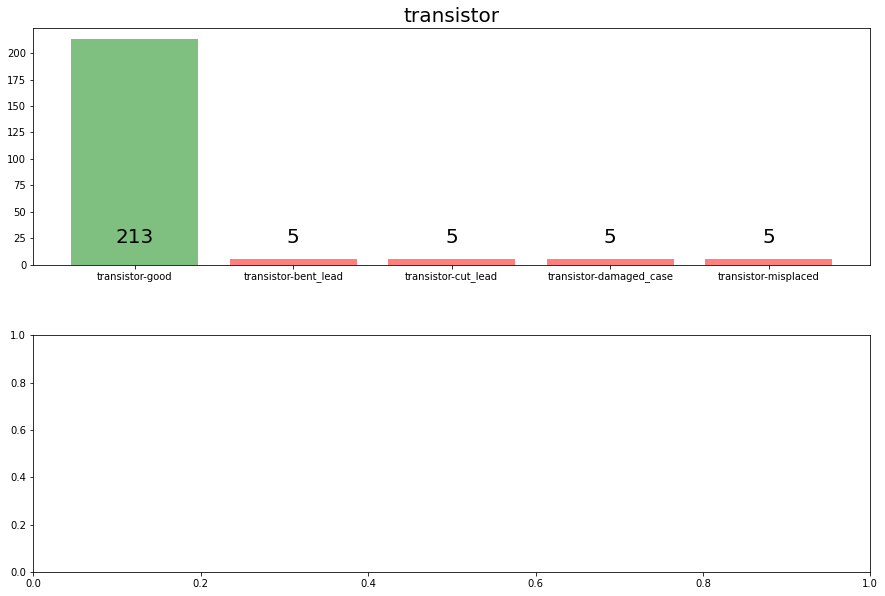

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()

for i, (className, df) in enumerate(anomaly_dict.items()):
    if i == 1: break
    colors = ['red' for i in range(len(df.index))]
    colors[0] = 'green'
    axs[i].bar(df.index, df.iloc[:, 0], color=colors, alpha=0.5)
    axs[i].set_title(className, fontsize=20)
    for j, value in enumerate(df.iloc[:, 0]):
        axs[i].text(j, 20, df.iloc[:, 0][j], ha='center', fontsize=20)
        
plt.savefig('./myfigure.png', transparent = True)